# Task 1 Data Preprocessing

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Iris dataset.

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['classes'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df['classes'].value_counts()

classes
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# data exploration and visualization.

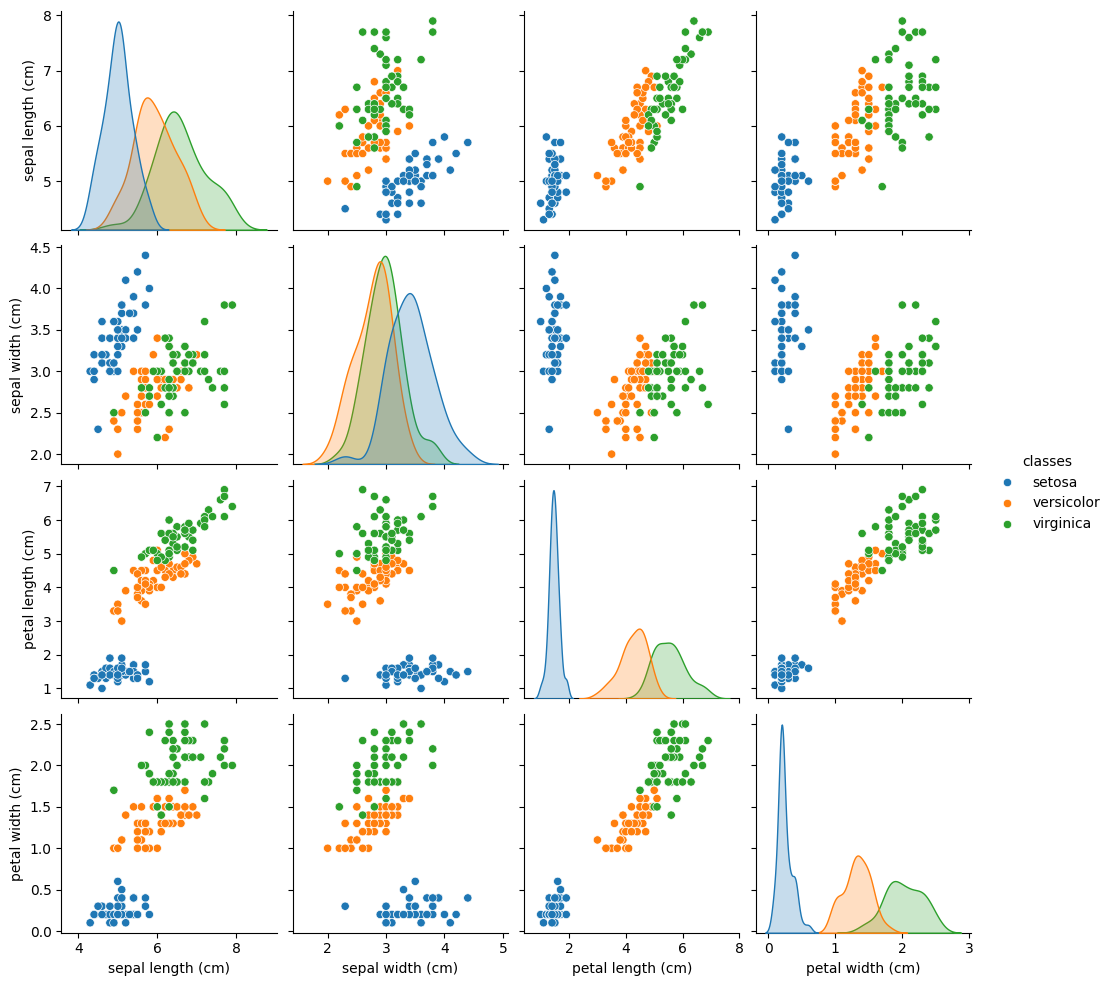

In [5]:
sns.pairplot(iris_df, hue='classes')
plt.show()


<Figure size 1200x1000 with 0 Axes>

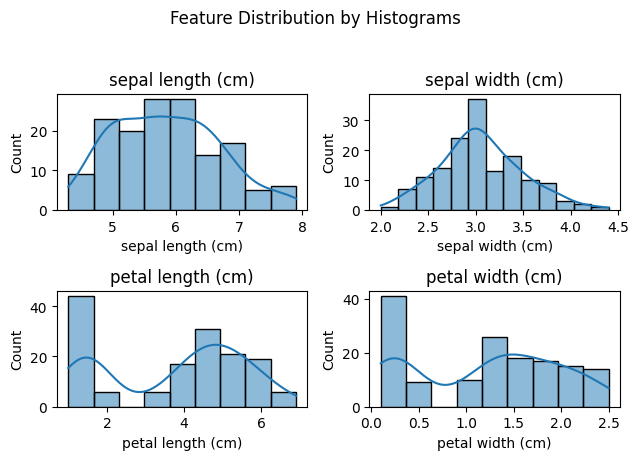

In [6]:
# matplotlib figure
plt.figure(figsize=(12, 10))

# Histograms for each feature
fig, axs = plt.subplots(2, 2)
fig.suptitle('Feature Distribution by Histograms')
features = iris_df.columns[:-1]
for i, ax in enumerate(axs.flatten()):
    sns.histplot(iris_df[features[i]], kde=True, ax=ax)
    ax.set_title(features[i])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


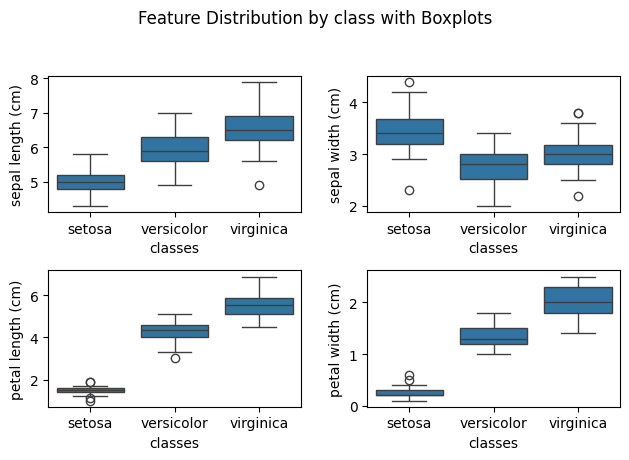

In [7]:
# Boxplots for each feature against the species
fig, axs = plt.subplots(2, 2)
fig.suptitle('Feature Distribution by class with Boxplots')
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='classes', y=features[i], data=iris_df, ax=ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

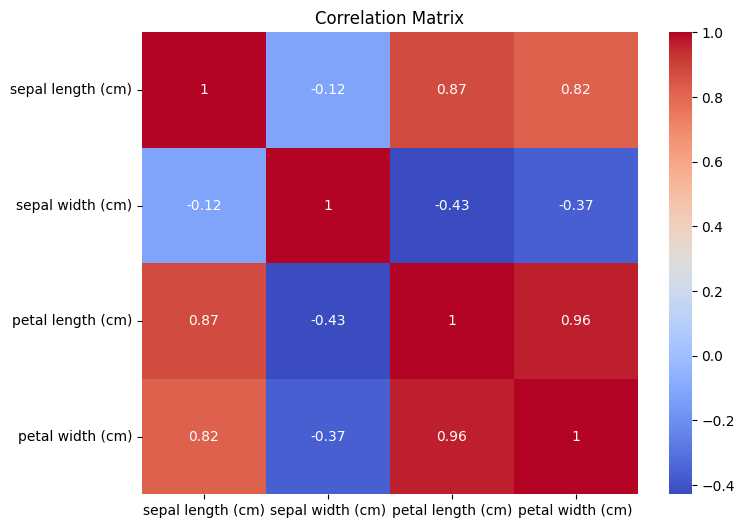

In [8]:
# Correlation matrix
corr = iris_df.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check for missing values

In [9]:
missing_values = iris_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
classes              0
dtype: int64


# Split the dataset into features and target variables.

In [10]:
X = iris_df.iloc[:, :-1]  
y = iris_df['classes']  

In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: classes, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

# Task 2 Unsupervised Learning: Clustering and Outlier Detection

## Apply K-means clustering

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df.iloc[:, :-1])

##  Visualize the clusters.

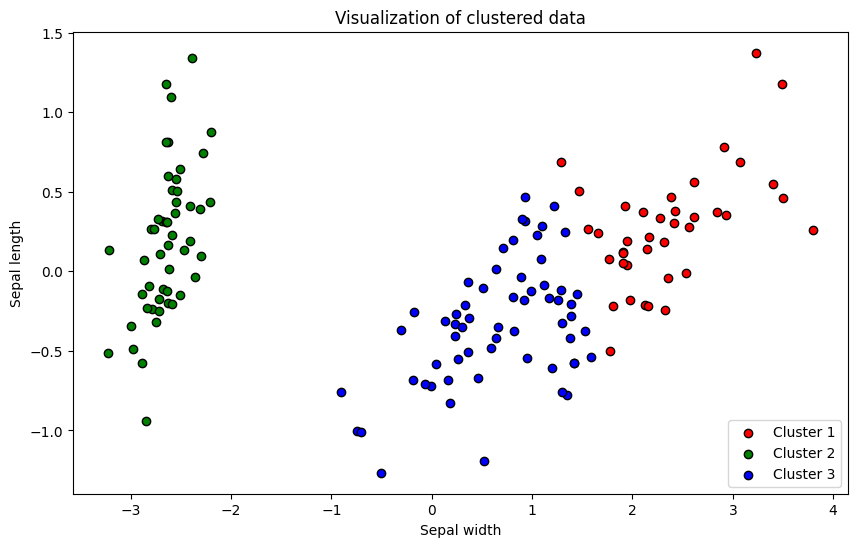

In [14]:
pca = PCA(n_components=2)  # Reduce dimensions for visualization
reduced_data = pca.fit_transform(iris_df.iloc[:, :-2])
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(reduced_data[iris_df['cluster'] == i, 0], reduced_data[iris_df['cluster'] == i, 1], 
                color=colors[i], label=f'Cluster {i+1}', edgecolor='k')

plt.title('Visualization of clustered data')
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.legend()
plt.show()

## Detect outliers using Isolation Forest

In [15]:
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(iris_df.iloc[:, :-2])
# Mark outliers in the dataset
iris_df['outlier'] = outliers == -1

## Evaluate the clustering results

In [16]:
silhouette_avg = silhouette_score(iris_df.iloc[:, :-3], iris_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


## Show outliers


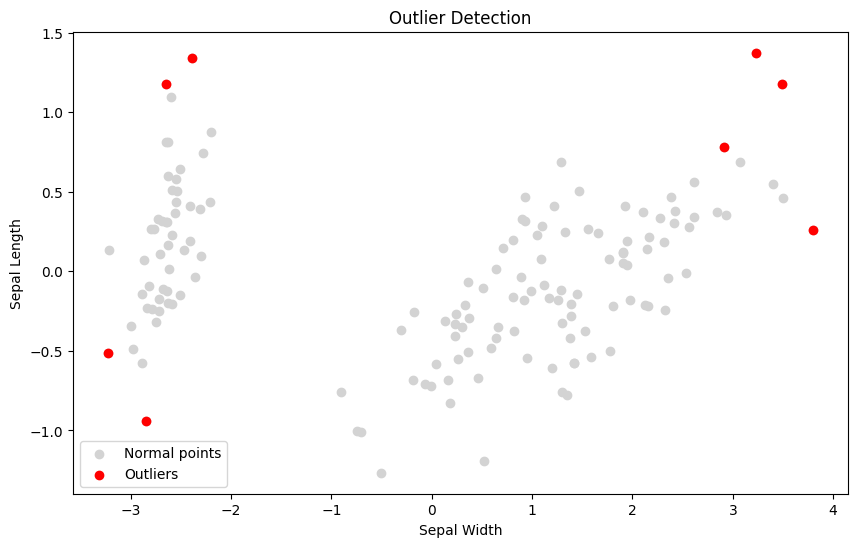

In [17]:
# Show outliers
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='lightgray', label='Normal points')
plt.scatter(reduced_data[iris_df['outlier'], 0], reduced_data[iris_df['outlier'], 1], c='red', label='Outliers')
plt.title('Outlier Detection')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

# Task 3 Supervised Learning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = iris_df.iloc[:, :-3]  
y = iris_df['classes']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)  # 70% training, 30% testing


model = LogisticRegression(max_iter=200) 
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

## Evaluate the baseline model's performance.

In [19]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy of the baseline model:", accuracy)

Accuracy of the baseline model: 0.9333333333333333


In [27]:
model.predict(X_test[:3])

array(['virginica', 'versicolor', 'versicolor'], dtype=object)

In [28]:
model.predict_proba(X_test[:3])

array([[1.89009621e-06, 3.23277430e-02, 9.67670367e-01],
       [4.52959858e-03, 7.63798457e-01, 2.31671944e-01],
       [9.23750319e-04, 5.05594214e-01, 4.93482036e-01]])

# Task 4 Model Comparison

## Select 3-4 machine learning algorithms

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models_3 = [LogisticRegression(), SVC(), RandomForestClassifier()]

## evaluate its performance using cross-validation.

In [23]:
for i in models_3:
    scores = cross_val_score(i, X, y, cv=5)
    print("cross_val accuracy of", type(i).__name__, ":", scores.mean())

cross_val accuracy of LogisticRegression : 0.9733333333333334
cross_val accuracy of SVC : 0.9666666666666666


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


cross_val accuracy of RandomForestClassifier : 0.96


## Select the best-performing algorithm.

In [24]:
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression()
best_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_logistic_regression = grid_search.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [30]:
# 2. Evaluate the Tuned Logistic Regression Model
tuned_pred_lr = best_logistic_regression.predict(X_test)
tuned_accuracy_lr = accuracy_score(y_test, tuned_pred_lr)
print("Tuned Logistic Regression Accuracy:", tuned_accuracy_lr)

Tuned Logistic Regression Accuracy: 0.9333333333333333


In [31]:
# 3. Ensemble of Multiple Models
from sklearn.ensemble import GradientBoostingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('logistic_regression', best_logistic_regression),
    ('random_forest', RandomForestClassifier()),
    ('gradient_boosting', GradientBoostingClassifier())
], voting='soft')

ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9111111111111111


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# 4. Compare the Performance of Tuned Model and Ensemble
if tuned_accuracy_lr > ensemble_accuracy:
    print("Tuned Logistic Regression performs better.")
else:
    print("Ensemble Model performs better.")

Tuned Logistic Regression performs better.
